# Keras kitten


In [1]:
# CPU
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import os
import pydot

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [4]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.
[b'non-cat' b'cat']
(209, 64, 64, 3)


b'cat'

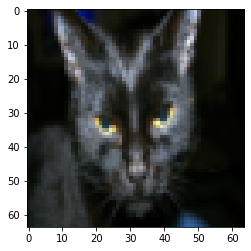

In [5]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")
train_set_x_orig[index].shape
print(classes)
print(train_set_x_orig.shape)
classes[np.squeeze(train_set_y[:, index])]

In [6]:
print(train_set_x_orig.shape)
print(test_set_x_orig.shape)
image_size = (64,64)
print(train_set_y.T[25])

(209, 64, 64, 3)
(50, 64, 64, 3)
[1]


In [7]:
image_size = (64, 64)
batch_size = 32
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_set_x_orig, train_set_y.T)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices(
    (test_set_x_orig, test_set_y.T)).batch(batch_size)

# Model

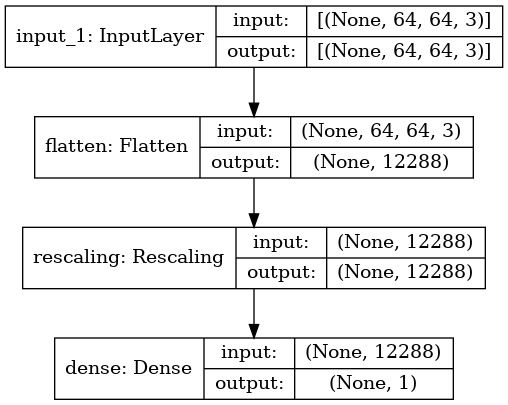

In [8]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    x = layers.Flatten(input_shape=(28, 28))(x)
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    #x = layers.Dense(1)(x)
    #x = layers.Activation("relu")(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)
model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

# Train

In [50]:
epochs = 100
callbacks = [
    keras.callbacks.ModelCheckpoint("checkpoint/save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(0.3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, 
    validation_data=test_ds,
)

Epoch 1/100
7/7 [==============================] - 1s 43ms/step - loss: 74.9244 - accuracy: 0.7604 - val_loss: 88.8868 - val_accuracy: 0.7400
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 47.4767 - accuracy: 0.6582 - val_loss: 79.1113 - val_accuracy: 0.7200
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 25.8618 - accuracy: 0.7940 - val_loss: 80.9913 - val_accuracy: 0.5600
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 2.5072 - accuracy: 0.9242 - val_loss: 157.8083 - val_accuracy: 0.3800
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 13.1354 - accuracy: 0.8570 - val_loss: 68.8977 - val_accuracy: 0.7000
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 4.0811 - accuracy: 0.9461 - val_loss: 60.1476 - val_accuracy: 0.7400
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.9833 - accuracy: 0.9584 - val_loss: 61.8933 - val_accuracy: 0.7400
Epoch 8/1

7/7 [==============================] - 0s 11ms/step - loss: 2.4870e-07 - accuracy: 1.0000 - val_loss: 79.4568 - val_accuracy: 0.6600
Epoch 58/100
7/7 [==============================] - 0s 10ms/step - loss: 2.4060e-07 - accuracy: 1.0000 - val_loss: 79.4531 - val_accuracy: 0.6600
Epoch 59/100
7/7 [==============================] - 0s 11ms/step - loss: 2.3297e-07 - accuracy: 1.0000 - val_loss: 79.4495 - val_accuracy: 0.6600
Epoch 60/100
7/7 [==============================] - 0s 11ms/step - loss: 2.2573e-07 - accuracy: 1.0000 - val_loss: 79.4459 - val_accuracy: 0.6600
Epoch 61/100
7/7 [==============================] - 0s 9ms/step - loss: 2.1887e-07 - accuracy: 1.0000 - val_loss: 79.4424 - val_accuracy: 0.6600
Epoch 62/100
7/7 [==============================] - 0s 9ms/step - loss: 2.1238e-07 - accuracy: 1.0000 - val_loss: 79.4390 - val_accuracy: 0.6600
Epoch 63/100
7/7 [==============================] - 0s 14ms/step - loss: 2.0618e-07 - accuracy: 1.0000 - val_loss: 79.4356 - val_accuracy: 

# Predict

In [ ]:
import imageio
from PIL import Image   
num_px = 64

In [47]:
def predict_image(my_image):
    img = keras.preprocessing.image.load_img(
        my_image, target_size=image_size
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    score = predictions[0]
    print(
        "This image is %.2f percent cat." % (100 * score)
    )

In [48]:
def plot_image(my_image):
    num_px = 64
    newsize = (num_px, num_px)
    image_orig = np.array(imageio.imread(my_image))
    my_image_array_plot = np.array(Image.fromarray(image_orig).resize(newsize))
    assert(my_image_array_plot.shape == (num_px, num_px, 3))
    plt.imshow(my_image_array_plot)

This image is 100.00 percent cat.


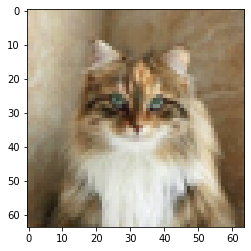

In [49]:
image="images/cat6c.jpg"
plot_image(image)
predict_image(image)